In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the training and test datasets
train_df = pd.read_excel("train.xlsx")
test_df = pd.read_excel("test.xlsx")

# Inspect the columns in train_df and test_df
print("Columns in train_df:")
print(train_df.columns)

print("\nColumns in test_df:")
print(test_df.columns)

Columns in train_df:
Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target'],
      dtype='object')

Columns in test_df:
Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18'],
      dtype='object')


In [12]:
# Define the number of clusters
n_clusters = 3  # Adjust based on your dataset

# Extract target column
train_target = train_df["target"]

# Drop target column for clustering
train_features = train_df.drop(columns=["target"])

# Check if the target column exists in test_df
if "target" in test_df.columns:
    test_features = test_df.drop(columns=["target"])
else:
    test_features = test_df.copy()  # No target column to drop

# Scale the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_features)
test_scaled = scaler.transform(test_features)

# Check the first few rows of train_scaled for verification
pd.DataFrame(train_scaled, columns=train_features.columns).head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-0.473214,0.395082,-0.174817,1.510124,1.668531,0.036842,-1.617062,0.944017,-0.972582,-1.195697,-0.033645,0.027544,0.358926,0.564597,-0.917757,-1.030627,0.288997,-0.981958
1,-1.274389,-1.063227,-0.787982,-1.314495,-0.066662,0.036842,0.111284,1.436140,1.008905,-0.907457,-0.668309,-0.987557,-1.216048,0.355452,0.059737,0.107850,1.281864,0.338691
2,1.472497,2.975166,1.174147,-0.086400,0.305165,0.152430,0.219306,-0.335504,0.348409,1.302380,1.024127,1.493800,-0.246833,-0.376559,-0.809147,0.392469,-0.207437,-0.981958
3,-0.702121,0.282904,0.683615,0.036410,-0.066662,-0.194335,-1.184976,-1.516600,-1.633077,0.629821,-1.937636,0.704277,-0.004529,-1.945152,-0.483315,-0.746008,-2.888180,-0.604629
4,-0.129853,-0.502339,-0.052184,0.282029,0.676992,1.192726,-0.320802,-0.532353,-0.500799,0.533741,0.495241,1.042644,1.206989,-1.213142,0.385568,-0.176769,-0.505298,-1.264954


c:\Users\LAKSHYA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


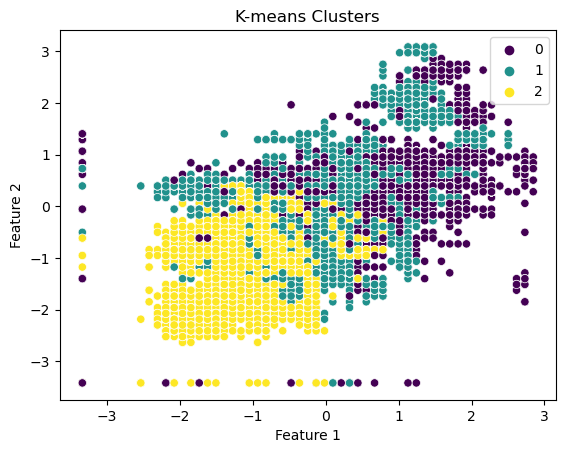

In [13]:
# Fit K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(train_scaled)

# Predict clusters for the training data
train_clusters = kmeans.predict(train_scaled)

# Add cluster labels to the training dataframe
train_df["Cluster"] = train_clusters

# Visualize the clusters (assuming the data is 2D or reducible to 2D)
sns.scatterplot(
    x=train_scaled[:, 0], y=train_scaled[:, 1], hue=train_clusters, palette="viridis"
)
plt.title("K-means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [22]:
# Predict clusters for the test data
test_clusters = kmeans.predict(test_scaled)

# Add cluster labels to the test dataframe
test_df["Cluster"] = test_clusters


# Function to predict and explain the cluster for a new data point
def predict_cluster(data_point):
    # Scale the data point
    data_point_scaled = scaler.transform([data_point])

    # Predict the cluster
    cluster = kmeans.predict(data_point_scaled)[0]

    # Explain the cluster assignment
    cluster_center = kmeans.cluster_centers_[cluster]
    explanation = f"The data point belongs to cluster {cluster} because it is closest to the cluster center {cluster_center}."

    return cluster, explanation


# Example usage of the function with a row from test_df
data_point = test_df.drop(columns=["Cluster"]).iloc[0].values
cluster, explanation = predict_cluster(data_point)
print(f"Data point: {data_point}")
print(f"Cluster: {cluster}")
print(f"Explanation: {explanation}")


Data point: [-76 -83 -70 -66 -64 -72 -64 -69 -60 -76 -83 -78 -81 -81 -81 -70 -60 -60]
Cluster: 2
Explanation: The data point belongs to cluster 2 because it is closest to the cluster center [-0.75784519 -0.80096698 -0.69396492 -0.5041392  -0.21402083 -0.18590363
  0.45228169  0.79798307  0.85677068 -0.81370573 -0.79634239 -0.79666214
 -0.61720144  0.17699627  0.07907694  0.50464363  0.73837819  0.84633229].


c:\Users\LAKSHYA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
